In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img1 = cv2.imread("../notebooks/DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, code=cv2.COLOR_BGR2RGB)

img2 = cv2.imread("../notebooks/DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, code=cv2.COLOR_BGR2RGB)

(1401, 934, 3)


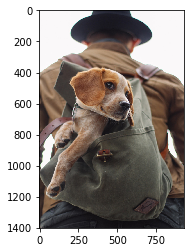

In [12]:
print(img1.shape)
plt.imshow(img1)

(1280, 1277, 3)


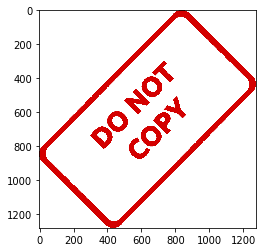

In [13]:
print(img2.shape)
plt.imshow(img2)

In [26]:
'''
BLENDING IMAGES OF SAME SIZE.
'''
img1 = cv2.resize(img1, dsize=(1200, 1200))
img2 = cv2.resize(img2, dsize=(1200, 1200))

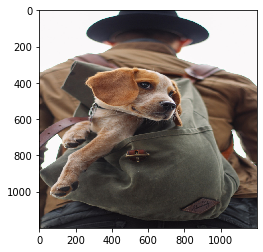

In [27]:
plt.imshow(img1)

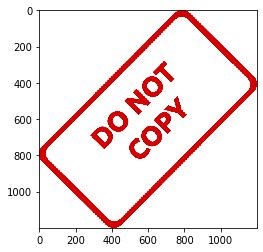

In [28]:
plt.imshow(img2)

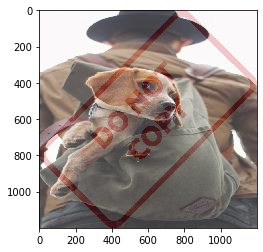

In [29]:
# Alpha and beta values' intensity decides how intense each of the image shows after blending.
blended = cv2.addWeighted(src1=img1, alpha=.8, src2=img2, beta=.2, gamma=0)
plt.imshow(blended)

In [30]:
'''
OVERLAY SMALLER IMAGE ON TOP OF LARGER IMAGE (NO BLENDING).
'''
img1 = cv2.imread('../notebooks/DATA/dog_backpack.jpg')
img2 = cv2.imread('../notebooks/DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, code=cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, code=cv2.COLOR_BGR2RGB)

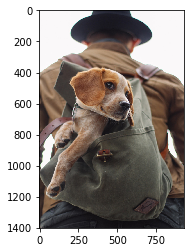

In [31]:
plt.imshow(img1)

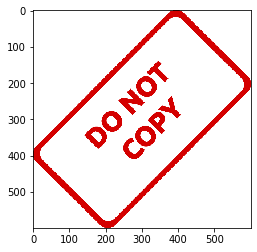

In [32]:
img2 = cv2.resize(img2, dsize=(600, 600))
plt.imshow(img2)

In [35]:
large_img = img1
small_img = img2

In [36]:
x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

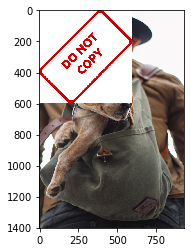

In [38]:
# NumPy Reassignment.
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

In [40]:
'''
BLENDING AND PASTING IMAGES OF DIFFERENT SIZES - MASKING
'''
img1 = cv2.imread("../notebooks/DATA/dog_backpack.jpg")
img2 = cv2.imread("../notebooks/DATA/watermark_no_copy.png")

img1 = cv2.cvtColor(img1, code=cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, code=cv2.COLOR_BGR2RGB)

large_img = img1
small_img = cv2.resize(img2, dsize=(600, 600))

In [41]:
print(large_img.shape)
print(small_img.shape)

(1401, 934, 3)
(600, 600, 3)


In [43]:
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]

In [44]:
rows, cols, channels = small_img.shape
print(rows, cols, channels)

600 600 3


In [47]:
# ROI - REGION OF INTEREST.
roi = large_img[y_offset:large_img.shape[0], x_offset:large_img.shape[1]]
roi.shape

(600, 600, 3)

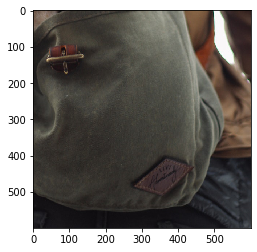

In [48]:
plt.imshow(roi)

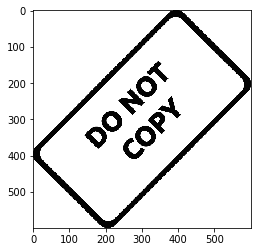

In [67]:
# Create a MASK.
img2gray = cv2.cvtColor(small_img, code=cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap="gray")

(600, 600)

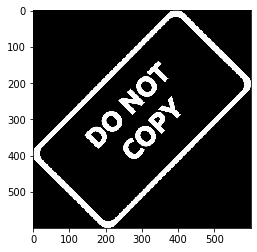

In [68]:
# INVERT THE GRAYSCALE IMAGE, HENCE BLACKED IMAGE AREA BLOCK OUT RED IN THE ORIGINAL IMAGE.
mask_invert = cv2.bitwise_not(img2gray)
plt.imshow(mask_invert, cmap='gray')
# Now this image has no color channel.
mask_invert.shape

(600, 600, 3)

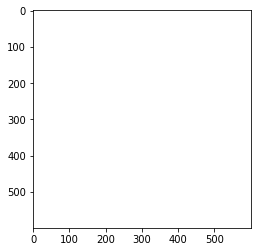

In [69]:
white_background = np.full(small_img.shape, 255, dtype=np.uint8)
plt.imshow(white_background)
white_background.shape

(600, 600, 3)

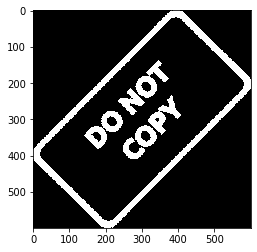

In [70]:
# Create a new image with all color channels using mask on to the 'white_background'.
bk = cv2.bitwise_or(src1=white_background, src2=white_background, mask=mask_invert)
plt.imshow(bk)
bk.shape

(600, 600, 3)

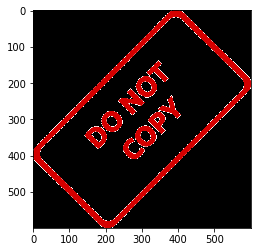

In [72]:
# Use mask to derive the color from original image.
foreground = cv2.bitwise_or(small_img, small_img, mask=mask_invert)
plt.imshow(foreground)
foreground.shape

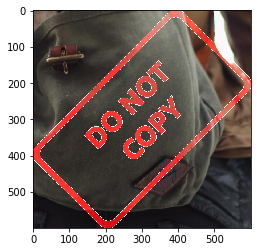

In [73]:
final_roi = cv2.bitwise_or(roi, foreground)
plt.imshow(final_roi)

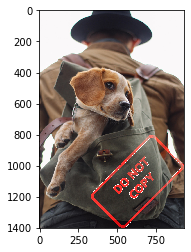

In [75]:
large_img[y_offset:large_img.shape[0], x_offset:large_img.shape[1]] = final_roi
plt.imshow(large_img)